## Tarefa 1: Métodos de um Passo

### Questão 3

Neste estudo, vamos aproximar o valor da segunda coordenada, $y$, da trajetória de um robô, cuja velocidade, para tal coordenada, é:

$$
\dot{y}(t) = e^{t}\left( sin(wt) + wcos(wt) \right)
$$

Partindo do ponto $y(0) = 1$, e com $w = 2$ radianos por segundo.

Usaremos o método de Euler, um tradicional método de passo único.
Os métodos de passo único atualizam calculam recursivamente as soluções de uma equação diferencial ordinária, de acordo com a forma geral $y_{k+1} = y_{k} + \Delta t \phi(t_k, y_k, n)$, onde $\Delta t = \dfrac{t_f - t_0}{n}$, com $t_k \in \{t_0, t_1, \cdots, t_f\}$, e $t_0$ e $t_f$ definindo o intervalo de aproximação.

A função $\phi$ depende do método utilizado, e equivale, no método de Euler, à função $f(t, y(t))$ - pré-definida e que modela o a variação de $y$ com $t$ no problema proposto. A lógica de construção do método de Euler vem da consideração de uma expressão aproximada para a derivada de uma função $y$:

$$
\dot{y}(t) \approx \dfrac{y(t + \Delta t) - y(t)}{\Delta t}
$$

Daí, temos que $y(t + \Delta t) \approx \Delta t \dot{y}(t) + y(t) = \Delta t f(t,y(t)) + y(t)$, e essa expressão induz a definição do método:

$$
y_{k+1} = y_k + \Delta t f(t,y(t)) \\
t_{k+1} = t_k + k\Delta t
$$

Comparando a expressão da aproximação da derivada da função $y$ com a derivada exata:

$$
\dot{y}(t) = \lim_{\Delta t \to 0 } \dfrac{y(t + \Delta t) - y(t)}{\Delta t}
$$

Notamos que, conforme $\Delta t$ se aproxima de $0$, a erro do método de Euler deve tender à $0$ - como é demonstrado na teoria do método.

### Implementação

In [1]:
#as bibliotecas numpy, matplotlib e math serão usadas ao longo do estudo
import numpy as np
import matplotlib.pyplot as plt
import math

Vamos definir a função $f$ do problema, tal que:

$$
\dot{y}(t) = f(t, y(t))
$$

In [2]:
#as funções cos e sin da biblioteca math recebem valores em radianos
def f(t_k, y_k):
    return math.exp(t_k)*(math.sin(2*t_k) + 2*math.cos(2*t_k))

O problema proposto induz a aproximação da função no intervalo $[0, 1]$, pois $t_0 = 0$, e queremos aproximar $y(1)$ - ou seja, $t_f = 1$. Analisaremos os resultados do método para diversos valores de $n$.

Agora, vamos definir uma função que implementa o método de Euler.

In [72]:
def euler(t_0, t_f, n, f, y_0):
    y = np.zeros(n)
    np.append(y, y_0)
    delta = (t_f - t_0) / n
    t = np.linspace(t_0, t_f, n)
    for k in range(0, n-1):
        y[k+1] = y[k] + delta * f(t[k], y[k])
        
    return t,y

In [77]:
def phi(tk, yk, delta, f):
    return 0.5 * (f(tk, yk) + f(tk + delta, yk + delta*f(tk, yk)))

In [78]:
def euler_modificado(t0, tf, n, f, phi, y0):
    y = np.zeros(n)
    np.append(y, y0)
    delta = (tf - t0) / n
    t = np.linspace(t0, tf, n)
    for k in range(0, n-1):
        y[k+1] = y[k] + delta * phi(t[k], y[k], delta, f)
        
    return t,y

In [4]:
T, Y_ = euler(0.0, 1.0, 1000, f, 1.0)

In [79]:
T_mod, Y_mod = euler_modificado(0.0, 1.0, 1000, f, phi, 1.0)

In [5]:
Y_[-1]

2.4701489567177299

In [80]:
Y_mod[-1]

2.4692545149969773

In [6]:
def Y(t):
    return math.exp(t)*math.sin(2*t)

In [7]:
Y(1)

2.4717266720048188

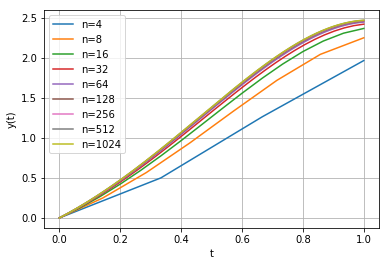

In [71]:
plt.figure()

ns = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

# Aproximacoes de x para diferentes n's
for n in ns:
    T, Y_ = euler(0.0, 1.0, n, f, 1.0)
    plt.plot(T, Y_, label = 'n='+str(n))

plt.xlabel('t')
plt.ylabel('y(t)')

plt.grid(True)
plt.legend()
plt.show()

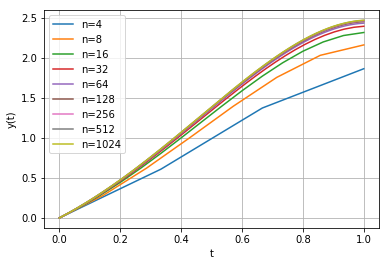

In [81]:
plt.figure()

ns = [4, 8, 16, 32, 64, 128, 256, 512, 1024]

# Aproximacoes de x para diferentes n's
for n in ns:
    T, Y_ = euler_modificado(0.0, 1.0, n, f, phi, 1.0)
    plt.plot(T, Y_, label = 'n='+str(n))

plt.xlabel('t')
plt.ylabel('y(t)')

plt.grid(True)
plt.legend()
plt.show()